In [ ]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
font = {'size'   : 18}

matplotlib.rc('font', **font)

In [ ]:
plateinfo_path=r'/Volumes/GoogleDrive/My Drive/ELISAarrayReader/images_scienion/2020-03-30-15-08-05-COVD_March25_fluplatetest_AdamsPlate/PlateInfoFLuplate.csv'
antigenOD_path=r'/Volumes/GoogleDrive/My Drive/ELISAarrayReader/images_scienion/2020-03-30-15-08-05-COVD_March25_fluplatetest_AdamsPlate/2020-03-31-12-07-21-COVID_March31_fluanalysis_ODSummary.xlsx'

In [13]:
plateinfo_dataframe=pd.read_csv(plateinfo_path)
plateinfo=plateinfo_dataframe.to_numpy()
#pprint(platinfo)
sera=plateinfo[0:12,1]
antigens=np.array(['Flu vaccine 2018-2019','HA H1','HA H3','HA H7','HA FluB I','HA FluB II'])
# Concentrations go up by rows which occur every 12th index.
pprint(plateinfo[0:5,:])
pprint(plateinfo[1::12,3])  # index into concentraitons for sera#12


array([['A1', 'HumanReferencePlasma', 'Control', 1.0],
       ['A2', 'anti-HA mAb MEDI8852', 'Control', 1.0],
       ['A3', 'antii-HA mAb TF19', 'Control', 1.0],
       ['A4', 'MS-Day0', 'Diagnostic', 0.001],
       ['A5', 'MS-Day7', 'Diagnostic', 0.001]], dtype=object)
array([1.0, 0.25, 0.0625, 0.015625, 0.00390625, 0.000976563,
       0.00024414099999999997, 6.10352e-05], dtype=object)


# Sort ODs in antigen x dilutions x sera format.


In [11]:
# Read OD from Scienion outputs.
ODscienion_dataframe=pd.read_excel(antigenOD_path, sheet_name='ODs')
ODscienion=np.array(ODscienion_dataframe.to_numpy()[:,1:]) 

ODsortedBySera=ODscienion.reshape(6,8,12)
pprint(ODsortedBySera[0,0:8,0]) # check against the excel sheet A1,B1,C1,...,H1
pprint(ODsortedBySera[0,0,0:12])# check against the excel sheet A1,A2,...,A12


array([98.601, 49.44, 35.474, 13.635, 6.235, 5.79, 2.31, 0.607],
      dtype=object)
array([98.601, 120.846, 132.974, 68.609, 92.476, 96.389, 84.169, 65.057,
       48.826, 59.356, 58.276, 0.037], dtype=object)


In [22]:
# Construct array of concentraitons dilution x sera format
concentrations=np.zeros((8,12))
for n in range(len(sera)):
    concentrations[:,n] = plateinfo[n::12,3]
pprint(concentrations[:,1])

array([1.00000e+00, 2.50000e-01, 6.25000e-02, 1.56250e-02, 3.90625e-03,
       9.76563e-04, 2.44141e-04, 6.10352e-05])


## Visualize serum response vs dilutions per antigen

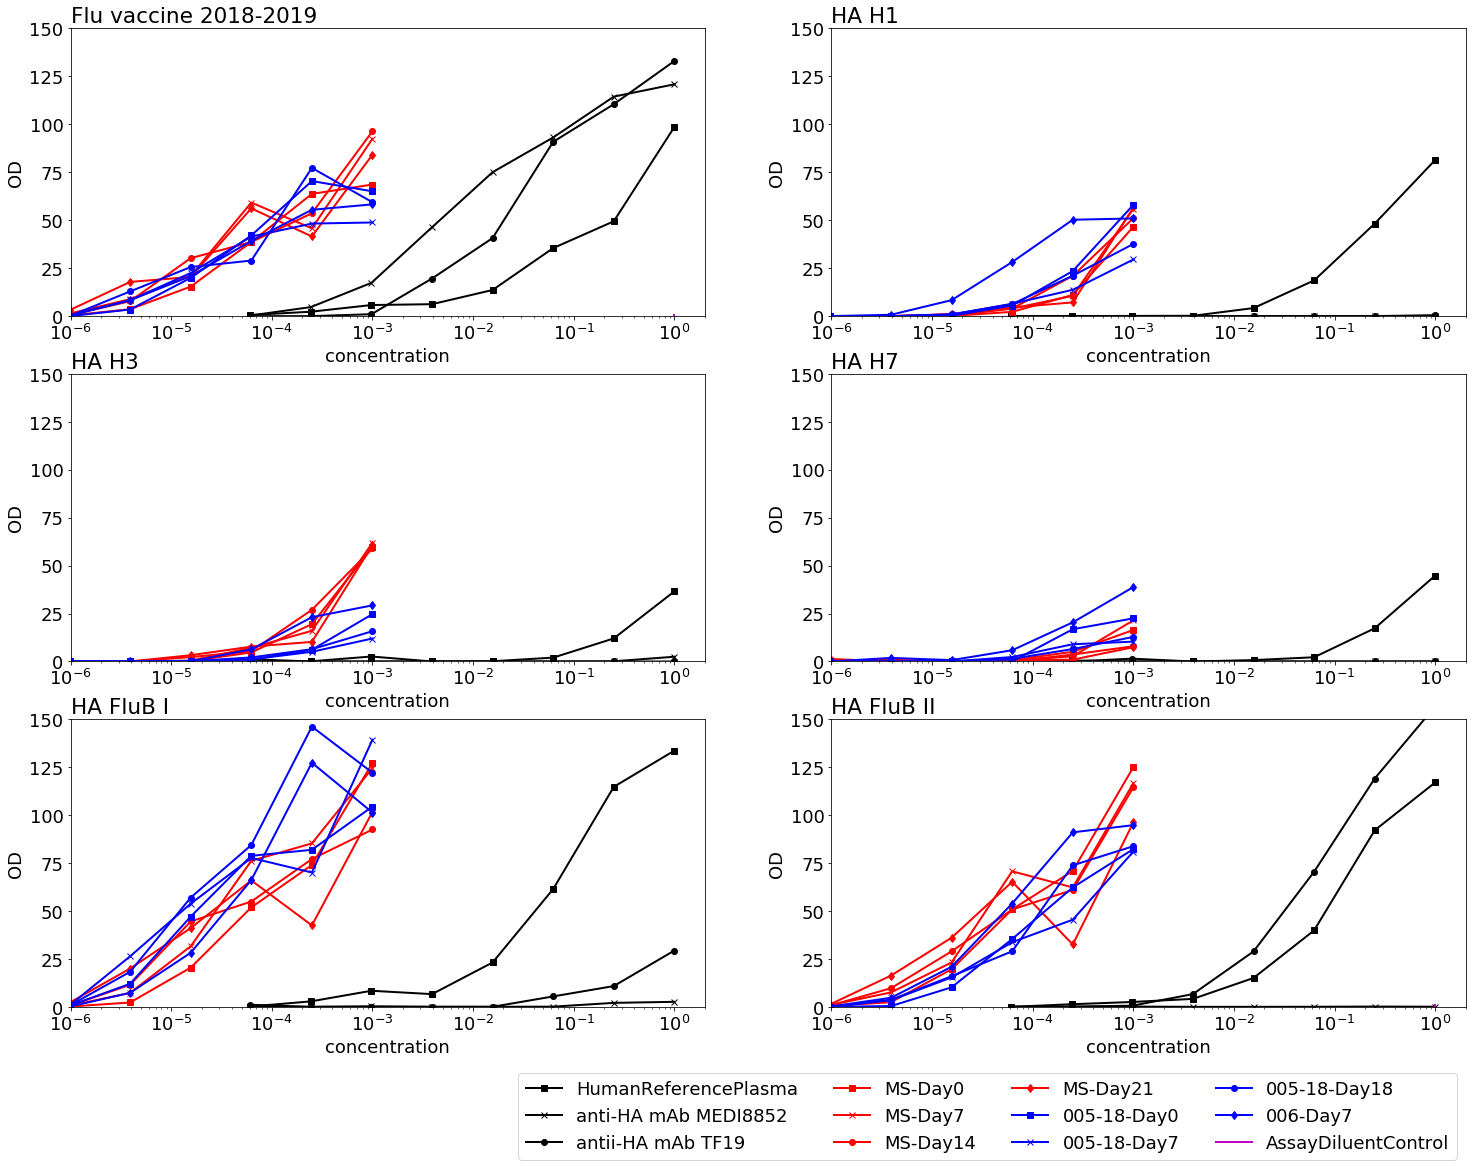

In [80]:
fig, ax = plt.subplots(3,int(len(antigens)/3), figsize=(25,18))
linestyle=['ks-','kx-','ko-','rs-','rx-','ro-','rd-','bs-','bx-','bo-','bd-','m-']
ax = ax.flatten()
for a in range(len(antigens)):
    for s in range(len(sera)):
        OD= np.array(ODsortedBySera[a,:,s], dtype='float')
        OD=np.flipud(np.squeeze(OD))
        conc=np.flipud(np.squeeze(concentrations[:,s]))
        ax[a].semilogx(conc,OD,linestyle[s],lw=2)
        ax[a].set_ylim([0,150])
        ax[a].set_xlim([1E-6,2])
        
        ax[a].set_title(antigens[a],loc='left');
        ax[a].set_ylabel('OD')
        ax[a].set_xlabel('concentration')
ax[a].legend(sera,bbox_to_anchor=(1, -0.2), loc='best', ncol=4)
plt.savefig('ODvsConcentrationPerAb.png')

## Visualize antigen binding vs dilution/ per serum

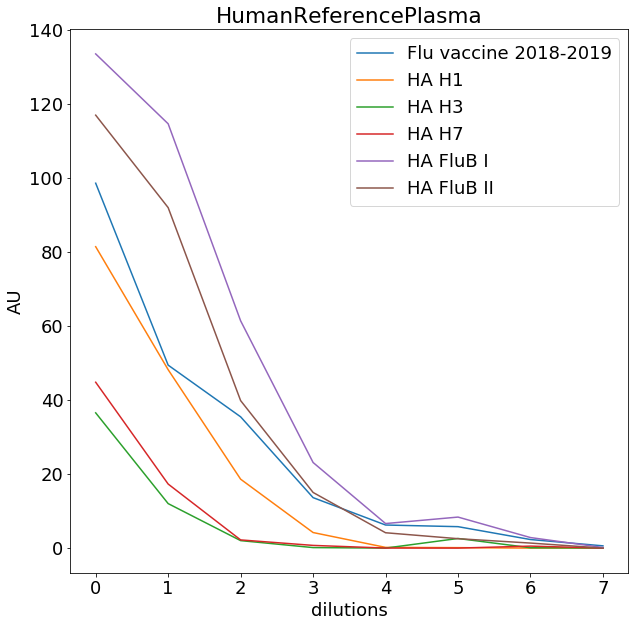

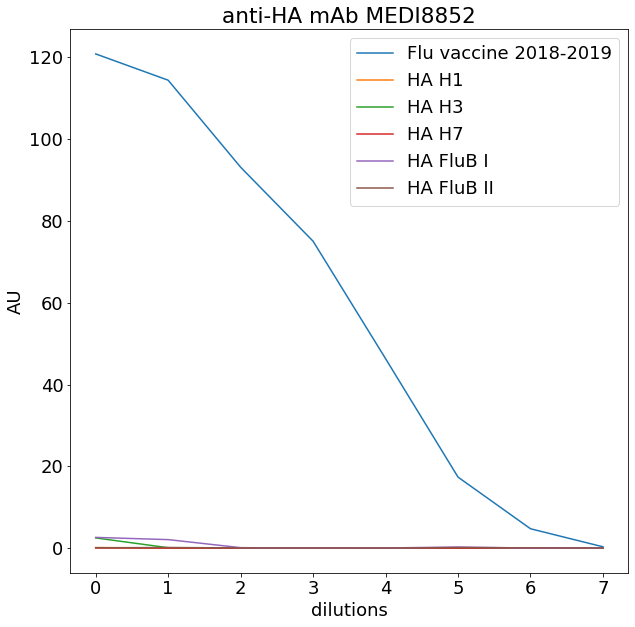

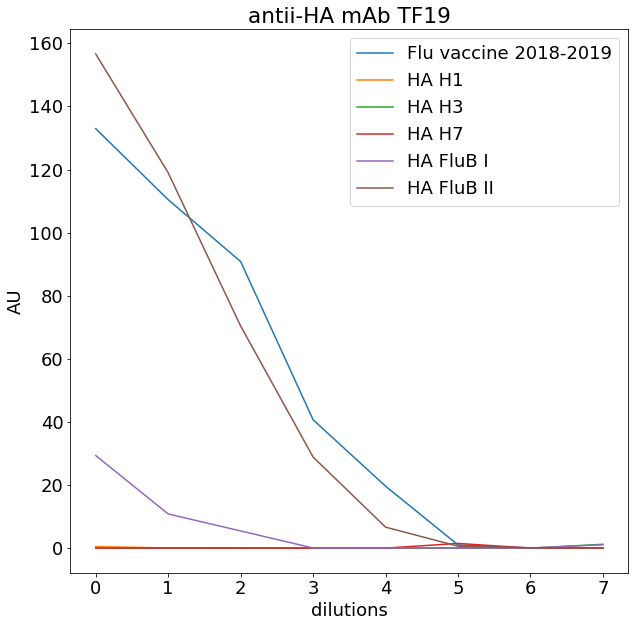

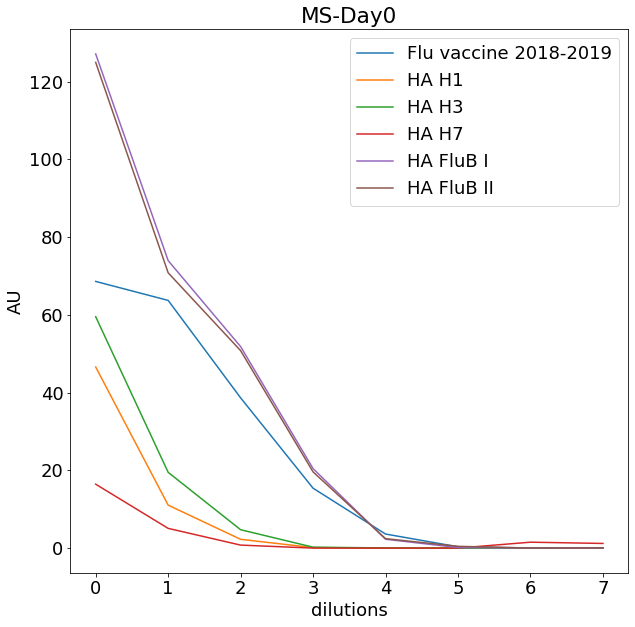

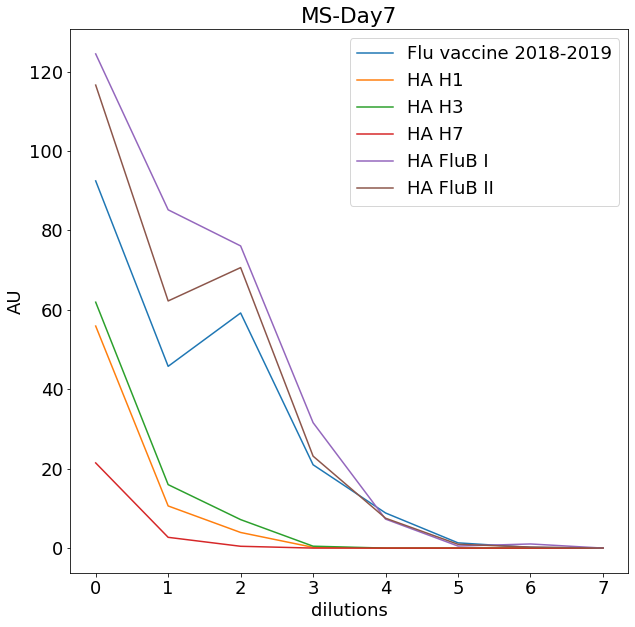

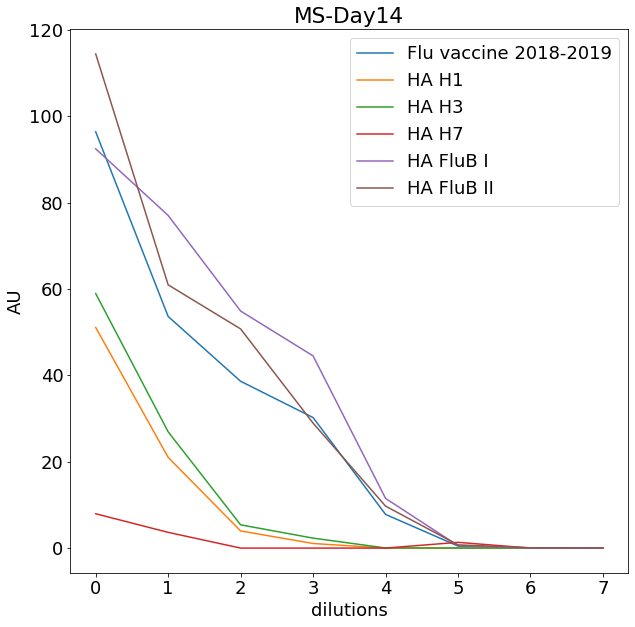

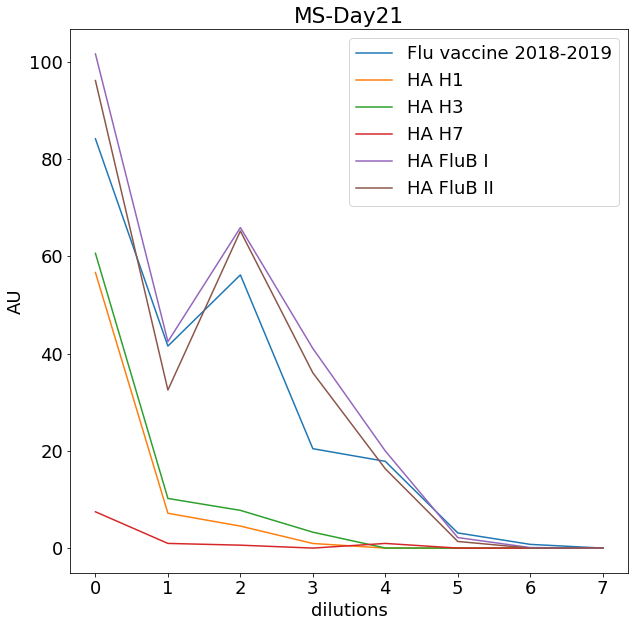

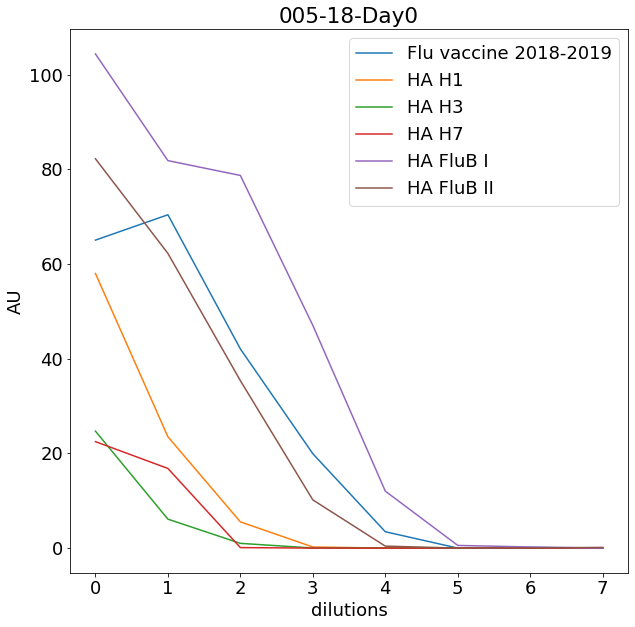

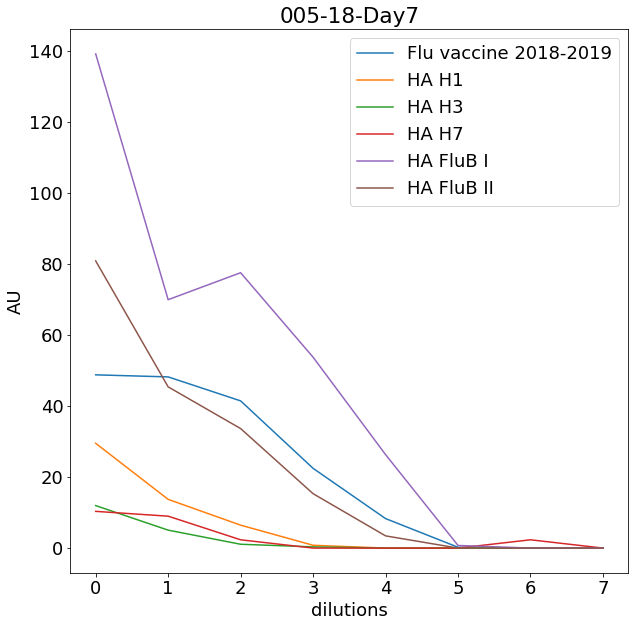

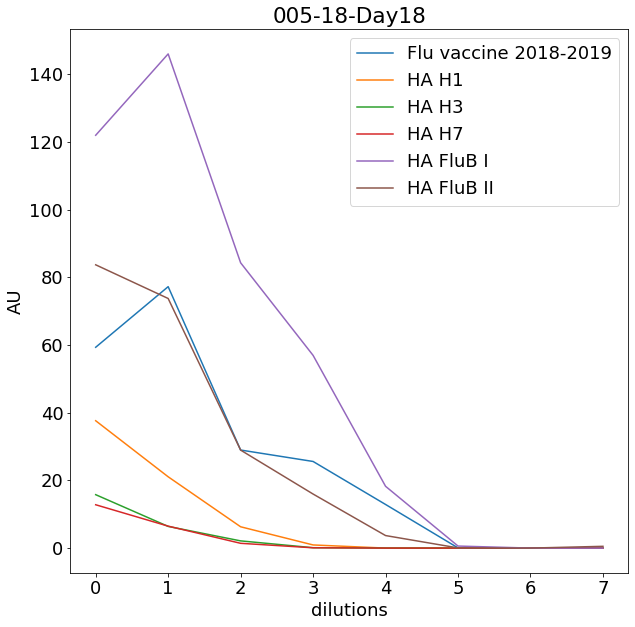

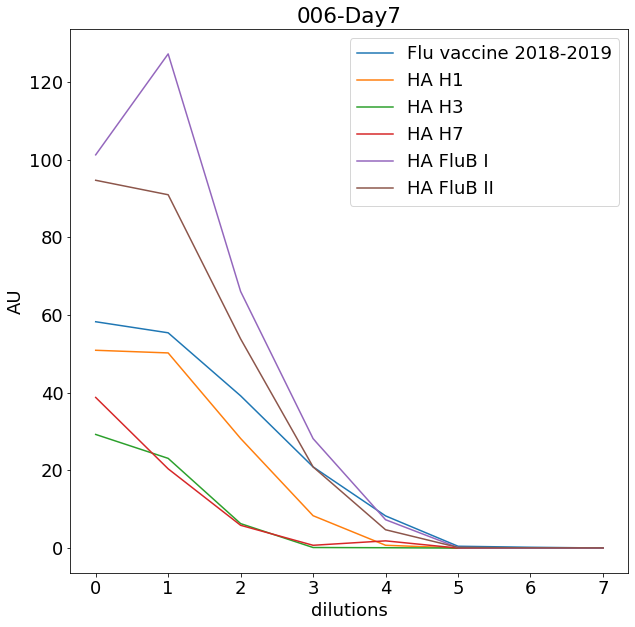

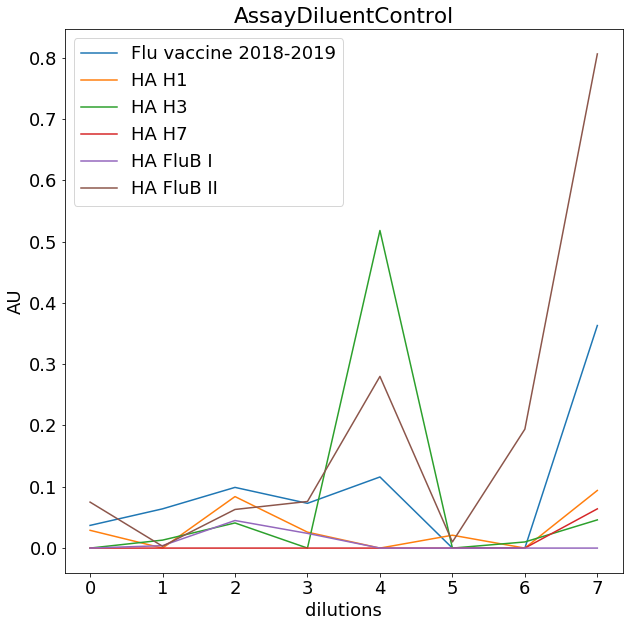

In [43]:
for s in sera:
    ODantigen= np.array(ODsortedBySera[:,:,sera == s], dtype='float')
    ODvsDilutions=np.transpose(np.squeeze(ODantigen))
    plt.figure(figsize=(10,10))
    plt.plot(ODvsDilutions);
    plt.title(sera);
    plt.legend(antigens)
    plt.ylabel('AU')
    plt.xlabel('dilutions')
    #plt.xticks(ticks=range(0,12),labels=sera,rotation=45);